submission score: 0.78468
After about ten days on this dataset, I am kind of tired of it. So I decided to polish it up a little and make it public. I know it is far from perfect, but I think that going through the publishing process would help me organize my learning. Also, I hope that I can start accumulating some kernel medals and/or receive some critism so that I can start some reinforced learning in my head. 

In [1]:
# some routine imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data and Exploratory Data Analysis (EDA)
my_train_data = pd.read_csv("../input/titanic/train.csv", index_col=0)
my_test_data = pd.read_csv("../input/titanic/test.csv", index_col=0)
my_train_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
my_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


I combined data in one dataframe for consistency through feature manipulation and engineering. I see many people use a list to bind train and test data sets and use a for loop to enforce identical manipulation on both. I did not realized the difference until I am typing this note.
There is a problem with my approach: the test data should not **LEAK** back to the train by any means; but when I do a `groupby().mean()` on my combined dataframe, this is unavoidable.

In [4]:
my_test_data['Survived'] = 0
my_all_data = pd.concat([my_train_data,my_test_data], ignore_index=True)
my_all_data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.261268
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.439494
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [5]:
print(my_train_data.Age.count(), my_test_data.Age.count(), my_all_data.Age.count())

714 332 1046


In [6]:
missing = my_all_data.isnull().sum()
missing_pct = missing/len(my_all_data)*100
print(pd.DataFrame(data=[missing, missing_pct]))
      
missing_table = pd.DataFrame(data=[missing, missing_pct],
                            index=['missing','% missing'])
missing_table.T # convinient way to rotate the data

          Age        Cabin  Embarked      Fare  Name  Parch  Pclass  Sex  \
0  263.000000  1014.000000  2.000000  1.000000   0.0    0.0     0.0  0.0   
1   20.091673    77.463713  0.152788  0.076394   0.0    0.0     0.0  0.0   

   SibSp  Survived  Ticket  
0    0.0       0.0     0.0  
1    0.0       0.0     0.0  


,missing,% missing
Age,263.0,20.091673
Cabin,1014.0,77.463713
Embarked,2.0,0.152788
Fare,1.0,0.076394
Name,0.0,0.000000
Parch,0.0,0.000000
Pclass,0.0,0.000000
Sex,0.0,0.000000
SibSp,0.0,0.000000
Survived,0.0,0.000000


In [7]:
# deal with missing data
# drop Cabin; mode for Embarked and Fare; investigate Age
my_all_data = my_all_data.drop('Cabin', axis = 1)

In [8]:
my_all_data.Embarked = my_all_data.Embarked.fillna('S')
my_all_data.Embarked.value_counts(dropna=False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

There are so many different ways to visualize the data. I had to eventually suppress my curiousity and focus on extracting information from the plot.
I think I would stay with basic `matplotlib` and `seaborn` for a while. They provide good plots and are sufficient for data exploration. I would like to eventually migrate to Boken or other more advanced interactive visulizations since I really like to have the graphs 'speak'. But for now, there are just too much to be learned.

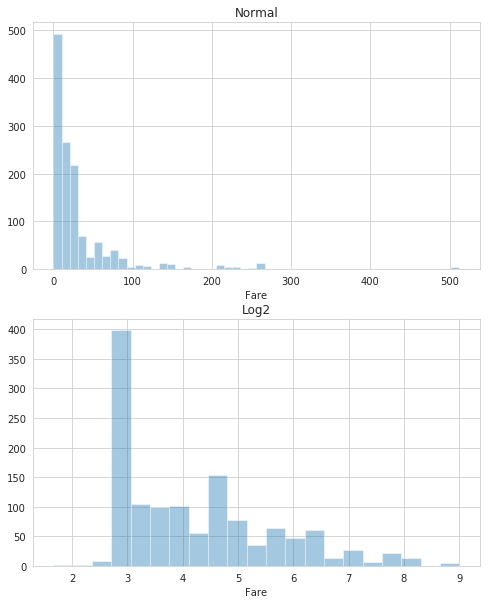

In [9]:
# exploring Fare distribution
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(8,10))
axis1.set_title('Normal')
sns.distplot(my_all_data.Fare.dropna(), kde=False, ax=axis1)
# print(np.log2(0))
temp = np.log2(my_all_data.Fare.dropna().loc[my_all_data.Fare != 0])
temp.sort_values()
axis2.set_title('Log2')
sns.distplot(temp, kde=False, ax=axis2)

this is the "Interactions: One of the easiest ways to create new features is by combining categorical variables" from Kaggle Courses->Feature Engineering->Feature Generation; as I was still experimenting with the technique, it was quite helpful to store the result separately from the origninal data, check it, and then merge it back.
I think it would go well with the LaborEncoder().

In [10]:
nona = my_all_data
sex_embark_pclass = nona.Sex.map(str)+"_"+nona.Embarked+"_"+nona.Pclass.map(str)
print(sex_embark_pclass.nunique(), sex_embark_pclass.count(), len(my_all_data))
sex_embark_pclass.value_counts()

18 1309 1309


male_S_3      366
male_S_2      149
female_S_3    129
male_S_1      108
female_S_2     93
female_C_1     71
female_S_1     71
male_C_1       70
male_C_3       70
male_Q_3       57
female_Q_3     56
female_C_3     31
male_C_2       17
female_C_2     11
male_Q_2        5
female_Q_2      2
female_Q_1      2
male_Q_1        1
dtype: int64

This must be where the LEAK occurs, as I am using both train and test data.

263
0
0


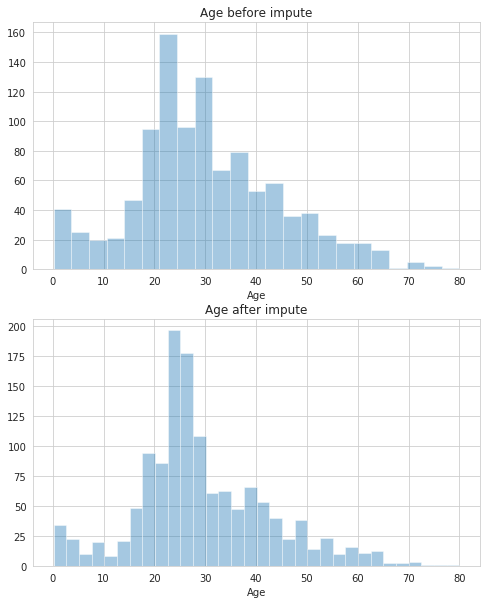

In [11]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(8,10))
axis1.set_title('Age before impute')
sns.distplot(my_all_data.Age.dropna(), kde=False, ax=axis1)
axis2.set_title('Age after impute')
old_ages = my_all_data.Age.copy()
my_all_data['AgeGroup'] = sex_embark_pclass
m_copy = my_all_data.copy()
print(m_copy.Age.isnull().sum())

m_copy.Age = m_copy.Age.fillna(m_copy.groupby('AgeGroup').Age.transform('mean'))
print(m_copy.Age.isnull().sum())
sns.distplot(m_copy.Age, kde=False, ax=axis2)
my_all_data.Age = m_copy.Age
print(my_all_data.Age.isnull().sum())

The above comparison hurts my near-sighted eyes

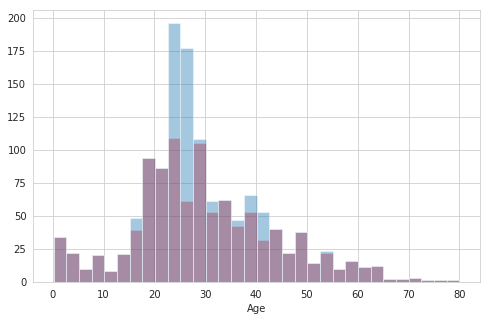

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(old_ages.dropna(), bins = 32, kde=False, color='red')

sns.distplot(m_copy.Age, kde=False)

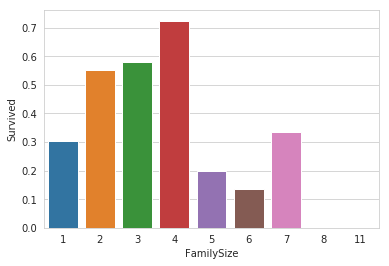

In [13]:
my_all_data['FamilySize'] = my_all_data.Parch + my_all_data.SibSp + 1
fsize_sur = my_all_data.loc[:890,['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
sns.barplot(x='FamilySize',y='Survived', data = fsize_sur)

categorizing using `apply` from Kaggel Courses->Pandas->Summary Functions and Maps->exercise kernel.

In [14]:
def t_c(df):
    if df['FamilySize'] == 1:
        return 0
    elif df['FamilySize'] < 5:
        return 1
    else:
        return 2
my_all_data['FSGroup'] = my_all_data.apply(t_c, axis=1)
my_all_data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,AgeGroup,FamilySize,FSGroup
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,male_S_3,2,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,female_C_1,2,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,female_S_3,1,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,female_S_1,2,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,male_S_3,1,0


first try with Random Forest gave a score of 0.77511

In [15]:
from sklearn.ensemble import RandomForestClassifier

my_train_data = my_all_data.iloc[:891]
my_test_data = my_all_data.iloc[891:]
y = my_train_data.Survived

features = ['Age','Embarked','Pclass', 'Sex', 'FSGroup']
X = pd.get_dummies(my_train_data[features])
X_test = pd.get_dummies(my_test_data[features])

model = RandomForestClassifier(n_estimators=100,max_depth=5,
                              random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId':my_test_data.index+1, 
                      'Survived': predictions})
output.head(10)
output.tail(5)

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [16]:
# output.to_csv('RF_submission.csv', index=False)

after first submission, I feel this try_model-submit-get_score pattern is not very efficient. Aslo I get only 10 submits/day, what if I want to test 20 different sets of parameters? From Andrew Ng's Machine Learning course, there is a concept of cross validation; from other Kagglers, there is an easy way to do it with `sklearn`.
I think I would try K-fold CV next time.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7932960893854749


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8044692737430168


In [20]:
model_names = ['Logistric Regression', 'K Nearest Neighbors (K=5)', 'Random Forest']
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)]

for name,model in zip(model_names, models):
    m = model
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print(name, 'accuracy score is: ', score)

Logistric Regression accuracy score is:  0.7932960893854749
K Nearest Neighbors (K=5) accuracy score is:  0.8044692737430168
Random Forest accuracy score is:  0.8100558659217877


I saw people extract the Title for feature engineering. The following is mostly copy/paste from other people's tutorials.
This should be a part of feature engineering (prior to modeling). But I do not think it has merged into my assets yet, so I just keep it here till I can naturally come up with something alike independently.

In [21]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# dataset['Title'] = dataset['Name'].apply(get_title)

my_all_data['Title'] = my_all_data.Name.apply(get_title)
my_all_data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,AgeGroup,FamilySize,FSGroup,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,male_S_3,2,1,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,female_C_1,2,1,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,female_S_3,1,0,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,female_S_1,2,1,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,male_S_3,1,0,Mr


In [22]:
my_all_data.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Don           1
Lady          1
Capt          1
Mme           1
Countess      1
Jonkheer      1
Sir           1
Dona          1
Name: Title, dtype: int64

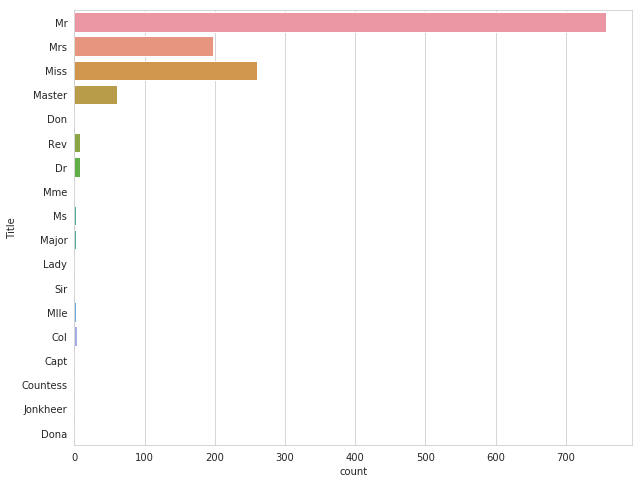

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(y=my_all_data.Title)

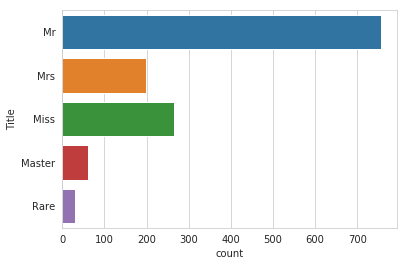

In [24]:
my_all_data['Title'] = my_all_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

my_all_data['Title'] = my_all_data['Title'].replace('Mlle', 'Miss')
my_all_data['Title'] = my_all_data['Title'].replace('Ms', 'Miss')
my_all_data['Title'] = my_all_data['Title'].replace('Mme', 'Mrs')
sns.countplot(y=my_all_data.Title)

In [25]:
my_train_data = my_all_data.iloc[:891]
my_test_data = my_all_data.iloc[891:]
y = my_train_data.Survived

features = ['Age','Embarked','Pclass', 'Sex', 'FSGroup']
X = pd.get_dummies(my_train_data[features])
X_test = pd.get_dummies(my_test_data[features])

model = RandomForestClassifier(n_estimators=100,max_depth=5,
                              random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId':my_test_data.index+1, 
                      'Survived': predictions})
output.head(10)
output.tail(5)

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [26]:
output.to_csv('RF_submission2.csv', index=False)